In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

test_data = pd.read_csv("D:/Assignments/Logistic Regression/Logistic Regression/Titanic_test.csv")
train_data = pd.read_csv("D:/Assignments/Logistic Regression/Logistic Regression/Titanic_train.csv")

In [169]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
# defined a new coloumn called as code 1,2 to determin train and test data
train_data["code"] = 1
test_data["code"] = 2

In [173]:
# merging the two data fils in one place
data = pd.concat([train_data,test_data])

In [177]:
data.shape

(1309, 13)

In [175]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  code         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [181]:
data['Age'].isna().sum()/len(data['Age'])*100

20.091673032849503

In [183]:
#Data cleaning

data['Age'].fillna(data['Age'].median(),inplace=True)
data['Fare'].fillna(data['Fare'].median(),inplace=True)


In [185]:
data['Cabin'].isna().sum()/len(data['Cabin'])*100

77.46371275783041

In [187]:
# since 93% of data blank so dropping it
#drop cabin column

data.drop('Cabin',axis=1,inplace=True)

In [189]:
#data["Embarked"].dropna(axis=0,inplace=True)

newdata = data[(data["Embarked"] == "S") | (data["Embarked"] == "C") | (data["Embarked"] == "Q")]
newdata.shape

(1307, 12)

In [191]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Embarked     1307 non-null   object 
 11  code         1307 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 132.7+ KB


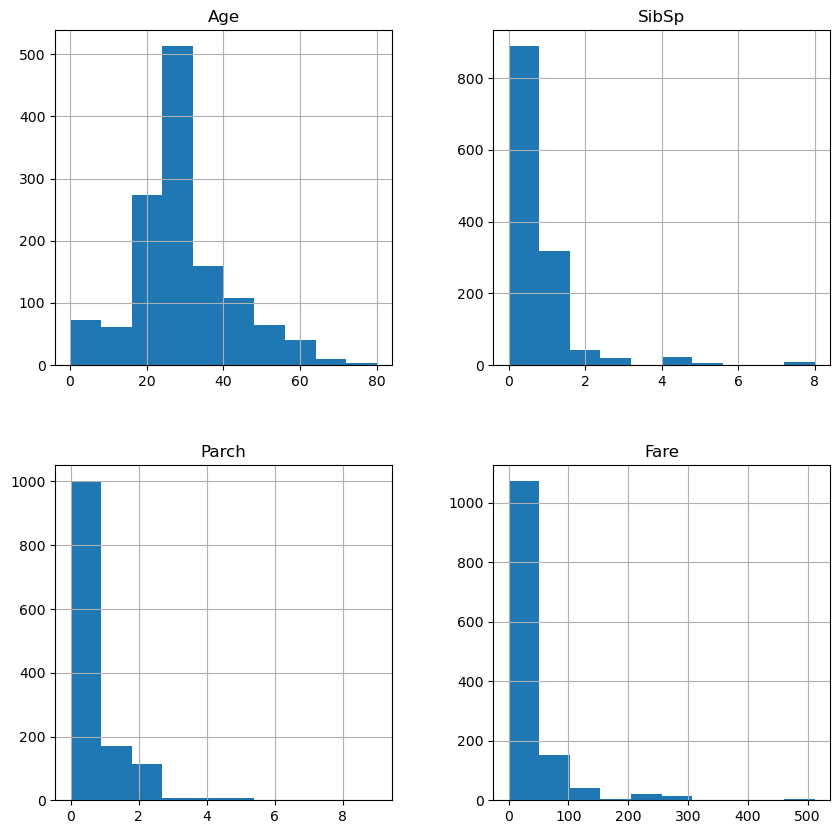

In [193]:
#visualizing the data set
#histplot
numerical_features = newdata[["Age","SibSp","Parch","Fare"]]
numerical_features.hist(figsize=(10, 10))
plt.show()

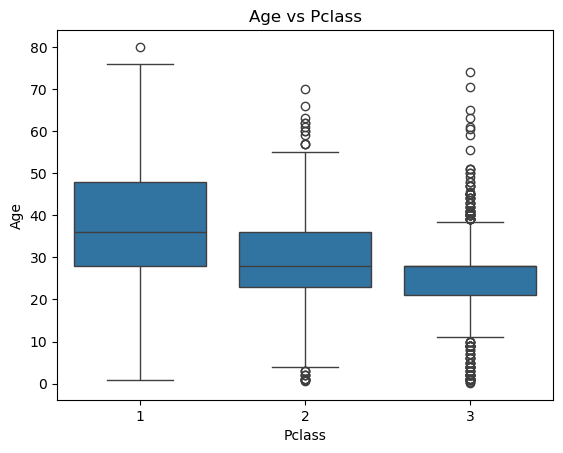

In [195]:
#boxplot
sns.boxplot(x='Pclass',y='Age',data=newdata)
plt.title('Age vs Pclass')
plt.show()

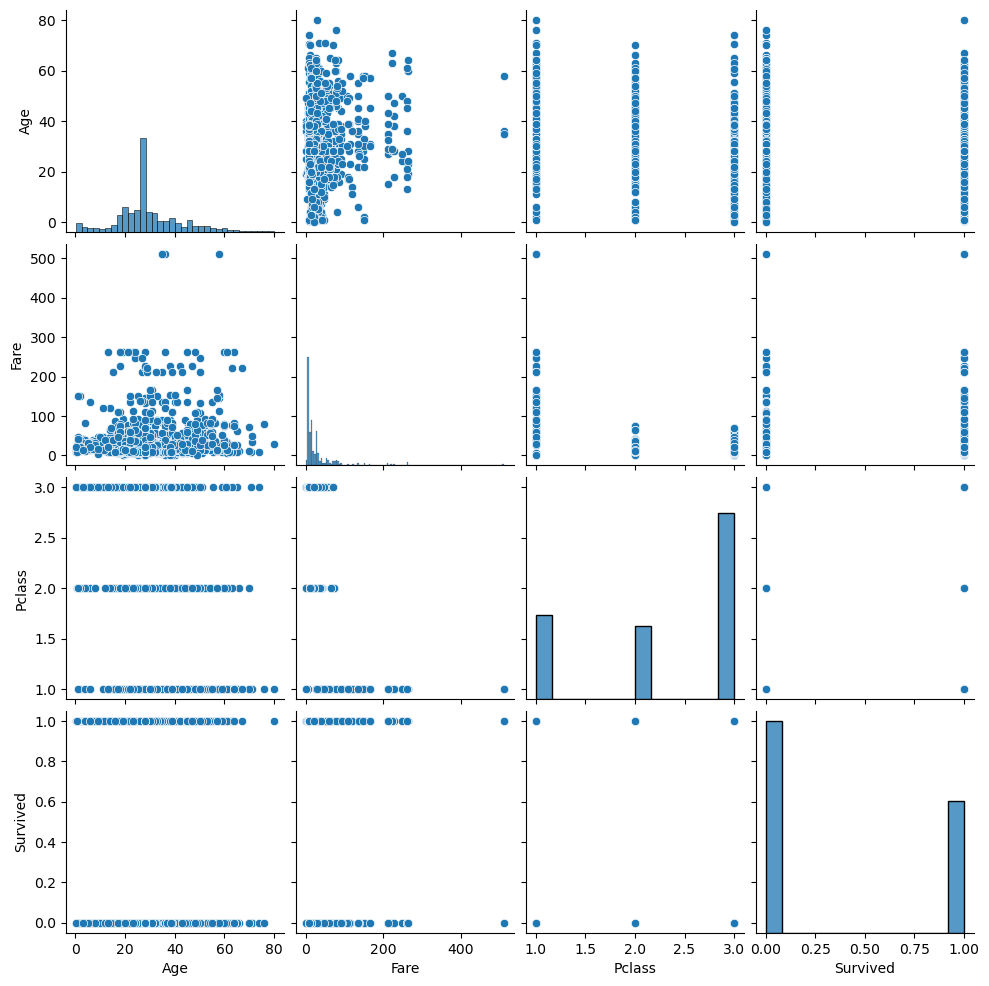

In [197]:
#pairplot
sns.pairplot(newdata[['Age','Fare','Pclass','Survived']])
plt.show()

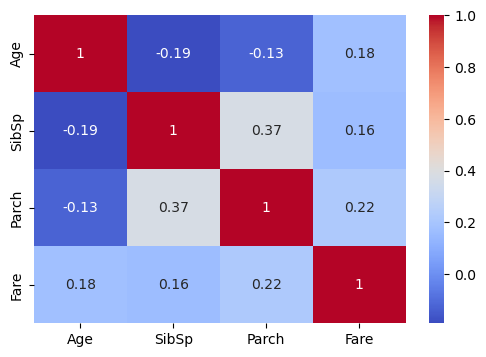

In [211]:
# Analyzing the correlation between features
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

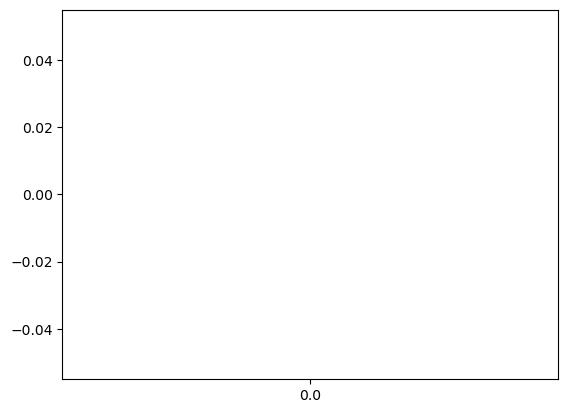

In [213]:
sns.countplot(x='Survived',data=newdata)
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

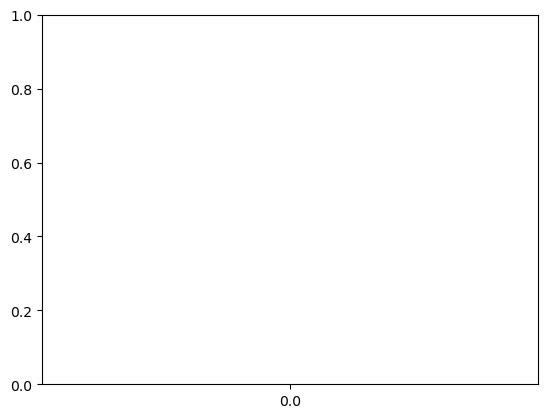

In [205]:
sns.countplot(x='Survived',data=newdata,hue='Sex')

In [215]:
newdata.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
code             0
dtype: int64

<Axes: >

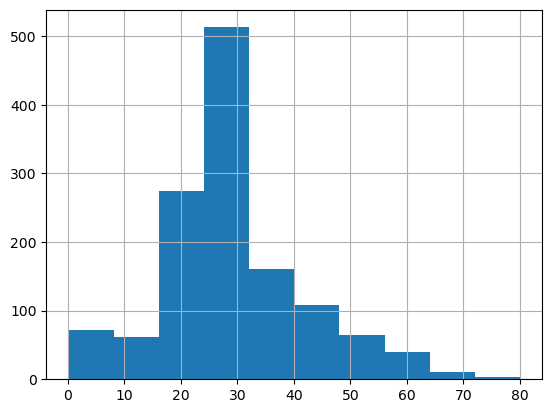

In [217]:
newdata["Age"].hist()

In [219]:
newdata["Embarked"].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [221]:
newdata["Age"].describe()

count    1307.000000
mean       29.471821
std        12.881592
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [223]:
#verify null values

newdata.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
code             0
dtype: int64

In [225]:
#convert sex column to numerical values

gender=pd.get_dummies(newdata['Sex'],drop_first=True)
newdata['Gender']=gender
newdata.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'code', 'Gender'],
      dtype='object')

In [227]:
newdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code,Gender
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,True


In [229]:
#drop the colums which are not required

#data.drop(data.columns[['Name','Sex','Ticket','Embarked']],axis=1,inplace=True)
newdata.drop(newdata.columns[[3,4,8,10]],axis=1,inplace=True)

In [231]:
newdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender
0,1,0.0,3,22.0,1,0,7.2500,1,True
1,2,1.0,1,38.0,1,0,71.2833,1,False
2,3,1.0,3,26.0,0,0,7.9250,1,False
3,4,1.0,1,35.0,1,0,53.1000,1,False
4,5,0.0,3,35.0,0,0,8.0500,1,True


In [233]:
newdata.ndim

2

In [235]:
SS = StandardScaler()
newdata[["Age"]] = SS.fit_transform(newdata[["Age"]])
newdata[["SibSp"]] = SS.fit_transform(newdata[["SibSp"]])
newdata[["Parch"]] = SS.fit_transform(newdata[["Parch"]])
newdata[["Fare"]] = SS.fit_transform(newdata[["Fare"]])

In [237]:
newdata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'code', 'Gender'],
      dtype='object')

In [159]:
newdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,1,0.0,3,-0.545236,0.480272,-0.445407,-0.501949,S,True
1,2,1.0,1,0.567123,0.480272,-0.445407,0.735501,C,False
2,3,1.0,3,-0.267147,-0.479537,-0.445407,-0.488905,S,False
3,4,1.0,1,0.358555,0.480272,-0.445407,0.384107,S,False
4,5,0.0,3,0.358555,-0.479537,-0.445407,-0.486489,S,True


In [239]:
df_new_train = newdata[newdata['code'] == 1]

In [241]:
df_new_train.shape

(889, 9)

In [243]:
df_new_test = newdata[newdata['code'] == 2]

In [245]:
df_new_test.shape

(418, 9)

In [247]:
x_train = df_new_train[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_train = df_new_train["Survived"]

In [249]:
x_test = df_new_test[["Pclass","Age","SibSp","Parch","Fare",'Gender']]
y_test = df_new_test["Survived"]

In [251]:
#IMPORTING LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [253]:
lr.fit(x_train,y_train)

LogisticRegression()

In [255]:
lr.coef_

array([[-1.04829233, -0.49408201, -0.34839432, -0.08170794,  0.15236021,
        -2.64243059]])

In [257]:
y_pred_train = lr.predict(x_train)
y_pred_train
#y_pred_test = lr.predict(x_test)

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [259]:
y_pred_test = lr.predict(x_test)

In [263]:
# calculatin the evalution matrics
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [265]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.795276,0.743827,0.708824,0.725904


In [267]:
df_new_train["Y_proba"] = lr.predict_proba(x_train)[:,1]
df_new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender,Y_proba
0,1,0.0,3,-0.580261,0.480272,-0.445407,-0.501839,1,True,0.099002
1,2,1.0,1,0.662297,0.480272,-0.445407,0.736023,1,False,0.891419
2,3,1.0,3,-0.269621,-0.479537,-0.445407,-0.488790,1,False,0.649527
3,4,1.0,1,0.429318,0.480272,-0.445407,0.384512,1,False,0.897235
4,5,0.0,3,0.429318,-0.479537,-0.445407,-0.486373,1,True,0.085455


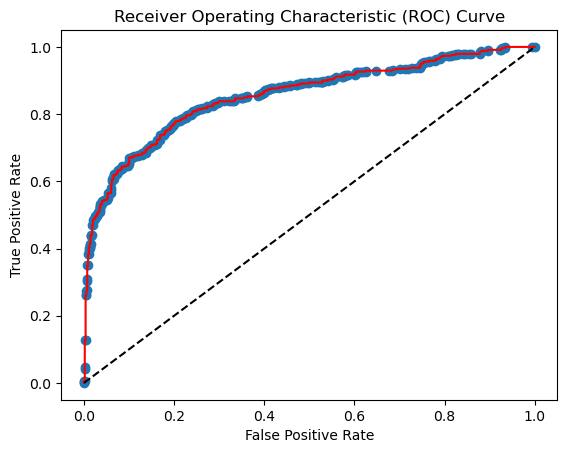

AUC score: 0.854


In [287]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_train,df_new_train["Y_proba"])
plt.plot(fpr,tpr,color='red')
plt.scatter(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print("AUC score:", roc_auc_score(y_train,df_new_train["Y_proba"]).round(3))

In [184]:
# Step 7: Save the model for deployment
import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Interview Questions

# 1.What is the difference between precision and recall? 
+ Precision:Precision measures the accuracy of positive predictions made by the model.
+ It answers the question: "Out of all the instances predicted as positive, how many are actually positive?" Precision is calculated as the ratio of true positives (correctly predicted positive instances) to the sum of true positives and false positives (instances incorrectly predicted as positive).
Recall:Recall measures the ability of the model to correctly identify all positive instances.
+ It answers the question: "Out of all the actual positive instances, how many did the model correctly predict as positiv Recall is calculated as the ratio of true positives to the sum of true positives and false negatives (instances incorrectly predicted as negative). "

# 2.What is cross-validation, and why is it important in binary classification? 
+ Cross-validation is a statistical technique used to evaluate the performance of machine learning models by partitioning the dataset into subsets, training the model on some subsets, and testing it on other subsets. The main idea behind cross-validation is to assess how well the model generalizes to new, unseen data. cross-validation is crucial in binary classification (as well as other types of classification tasks) for providing a more accurate assessment of model performance, mitigating overfitting, optimizing hyperparameters, and ensuring robustness, especially in scenarios where the data is limited or imbalanced.